# <i>Image Classification with Convolutional Neural Networks</i> #

#### The libraries needed for this project are: ####


 <I>
     <br>   1. NUMPY - highly optimized library for numerical operations with a MATLAB-style syntax. <br>
     <br>   2. MatPlotLib - two-dimensional plotting library. <br>
     <br>   3. TensorFlow - develops models for natural language processing, image and handwriting recognition, and more <br>
     <br>   3. OpenCv - Covers image processing operations such as: image filtering, geometrical image transformations, color space conversion, histograms, etc.<br>
 </I>


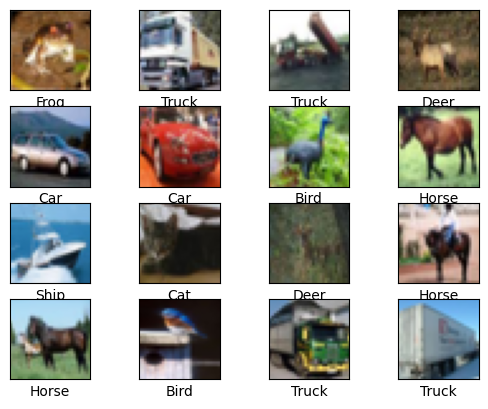

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models, layers, datasets

(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
#The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.

# Now normalise data, scaling it down. Pixels are activated from 0 to 255, depending how bright indivudual pixel is. Scale each one for values from 0 to 1.

training_images, testing_images = training_images / 255, testing_images / 255 # this scales them down to a max value of 1.

# Data is now collected and prepared.

# Now define class names list and visualise 16 out of all omages from dataset

class_names = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

for i in range(16):  # choosing only the first 16 images in the dataset
    plt.subplot(4, 4, i+1) # 4 x 4 grid filled with each image in the dataset (i)
    plt.xticks([])
    plt.yticks([]) # these two is to prevent any coordinates that may annoy the eye in the visualisation output.
    plt.imshow(training_images[i], cmap = plt.cm.binary) # binary colormap maps data values to shades of black and white, creating a binary-like image.

    plt.xlabel(class_names[training_labels[i][0]]) # Getting label of the image then passing the image's number as class list.

plt.show()

In [9]:
# The resolution of the dataset provide is very low, enough for even my human eye to identify what some of those are.
# Therefore, we can expect already that our prediction model will not be 100% accurate, due to the low quality of the dataset. 
# Nonetheless, let's give it a try! 

# First, optional, reducing the amount of images we are feedint the neural network. To save time in training the network on a laptop. Important note, this will sacrifice quality of the model for time.

training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Building and trainig the model

model = models.Sequential()

# Convolutional Neural Network Structure

# 1. Covolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape = (32, 32, 3))) #this layer filters for features in an image so it will look for long legs for a horse, pointy ears for a cat, and so on.

# 2. Pooling Layer 
model.add(layers.MaxPooling2D(2, 2))
# this layer simplifies the result from the convolutional layer and reduces it to the essential information.

# 3. Another Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape = (32, 32, 3))) # to process the result and increase efficacy of the model.

# 4. Another Pooling Layer
model.add(layers.MaxPooling2D(2, 2))

# 5. Another Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape = (32, 32, 3)))

# 6. Flattening layer
model.add(layers.Flatten()) # flattens the input making it 1 dimensional. If 10x10 matric it makes it inot a 1 dimensional layer of 100 units.

# 1. Dense Layers
model.add(layers.Dense(64, activation="relu")) # Output layer.
model.add(layers.Dense(10, activation="softmax")) # Softmax scales all results so they add up to 1. If you have 50,60, and 70, it will scale them so that they are percentages adding up to 1. A distribution of probabilities so you know how likely it is the particular answer or classifiction is the case.
# 10 units = 10 classifications. 

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"]) # Compile the model. Here is an explanation of the optimizer:

# Adam is short for Adaptive Moment Estimation. It is an optimization algorithm in the Keras/TensorFlow module. It's designed to handle sparse gradients on noisy problems. It combines the advantages of two other popular optimizers:

# 1. AdaGrad: Adapts the learning rate for each parameter individually based on the running sum of the magnitudes of their gradients.
# 2. RMSProp: Uses a moving average of squared gradients to normalize the gradient.

# Adam also maintains a moving average of the gradients and the squared gradients, which helps in adjusting the learning rate for each parameter dynamically. This makes Adam particularly effective and widely used.

# The "loss='sparse_categorical_crossentropy'loss='sparse_categorical_crossentropy'" function is commonly used for multi-class classification problems where the target labels are integer encoded. It calculates the difference between the predicted probabilities and the true class labels. It measures the performance of a classification model whose output is a probability value between 0 and 1.

# With "metrics=['accuracy']" we are telling the framework to evaluate the accuracy of the model during training and testing. 

model.fit(training_images, training_labels, epochs = 10, validation_data = (testing_images, testing_labels)) # epochs is how many time the model will see the same data provided. In this case 10. The Validate the model with testing datasets. 



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2712 - loss: 1.9531 - val_accuracy: 0.4440 - val_loss: 1.4931
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4728 - loss: 1.4470 - val_accuracy: 0.4988 - val_loss: 1.4184
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5519 - loss: 1.2581 - val_accuracy: 0.5732 - val_loss: 1.2092
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5960 - loss: 1.1458 - val_accuracy: 0.6108 - val_loss: 1.1219
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6428 - loss: 1.0170 - val_accuracy: 0.6058 - val_loss: 1.1086
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6627 - loss: 0.9499 - val_accuracy: 0.6315 - val_loss: 1.0641
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6969 - loss: 0.8659 - val_accuracy: 0.6388 - val_loss: 1.0375
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7054 - loss: 0.8323 - val_accuracy: 0.

In [ ]:
# Accuracy of the Model on training dataset: 70%
# Loss of the Model on training dataset: 90%

# Accuracy of the Model on validation dataset: 60%
# Loss of the Model on validation dataset: 1000%

# Interpretation of the Accuracy: The model correctly predicts the class of an input image approximately 59.60% of the time on the training set and 61.08% of the time on the validation set. These values give you an idea of the model's classification performance.

# Interpretation of the Loss: The training loss (1.1458) and validation loss (1.1219) values indicate how well the model's predictions match the actual labels. Lower values are generally better. The fact that the validation loss is slightly lower than the training loss suggests that the model is not overfitting and is generalizing reasonably well to unseen data.

In [15]:
# Test, evaulate, and save the model

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save("Image_Classifier_Model.keras") # the native .keras filepath extension is recommended for general reuse and future compatibility. This format is more future-proof and integrates well with the latest features and updates in TensorFlow/Keras.

# How to import the model on a later date: model = models.load_model("Image_Classifier_Model")

# Loss = 1.06 = 
# Accuracy = 0.65 = 65%

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - loss: 1.0371
Loss: 1.0582590103149414
Accuracy: 0.6527500152587891


In [85]:
# Resize the dataset to satisfy model scale criteris, 32 x 32

from PIL import Image
import os

path = "C:/Users/simon/Python/Machine_Learning/ImgClass_Dataset"
path_resized = "C:/Users/simon/Python/Machine_Learning/ImgClass_Dataset/ImgClass_Dataset_Resized"

def resize(width, height, path):
    for i in os.listdir(path): #lists all files in the dir
        file_path = os.path.join(path, i) # ensures correct path joining regardless of operating system.

        if os.path.isfile(file_path):
            img = Image.open(file_path)
            new_image = img.resize((width, height), Image.LANCZOS) # Image.LANCZOS for high-quality downsampling
            new_file_name = "resized-" + i
            new_image.save(os.path.join(path_resized, new_file_name))

resize(32, 32, path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


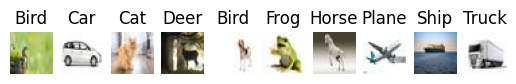

In [92]:

# 1- Load model
model = models.load_model("Image_Classifier_Model.keras")

# 2 - Grab dataset from images on the internet for real time testing. Use Pixabay.com for this
img_paths = [os.path.join(path_resized, f) for f in os.listdir(path_resized)] 

fig, axes = plt.subplots(1, len(img_paths))

for axes, img_path in zip(axes, img_paths):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Loading images with OpenCv "imread" func they're loaded with BGR colorschemes. So convert it to the model's colorscheme: RGB.
    img = np.array(img)/255.0
    img = np.expand_dims(img, axis=0) # Adds batch dimension for model to use multiple images as input instead of a single input.
    prediction = model.predict(img) # Need to pass image in a Numpy array 
    index = np.argmax(prediction) #gives index of the maximum value for the neuron with highest activation.

    axes.imshow(img[0], cmap = plt.cm.binary) # Remove batch dimension for display.
    axes.set_title(f"{class_names[index]}")
    axes.axis("off")




plt.show() # REMEMBER! Set this function last if you want the predictions to show as Titles of the plots.

